### SETUP

In [1]:
# --- CELLA 1: SETUP E CARICAMENTO ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Impostazioni standard per i grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Dimensioni standard per i grafici singoli
warnings.filterwarnings('ignore', category=FutureWarning) # Ignora avvisi futuri di Seaborn

# Carica i dati puliti (il nostro punto di partenza)
try:
    df_movimento = pd.read_csv('movimento_puliti.csv')
    df_portieri = pd.read_csv('portieri_puliti.csv')
    
    print("--- Dati Caricati Correttamente ---")
    print(f"Giocatori di Movimento: {df_movimento.shape}")
    print(f"Portieri: {df_portieri.shape}")

except FileNotFoundError:
    print("--- ERRORE ---")
    print("File 'movimento_puliti.csv' o 'portieri_puliti.csv' non trovati.")
    print("Assicurati di aver eseguito il notebook di pulizia e salvataggio.")

--- Dati Caricati Correttamente ---
Giocatori di Movimento: (15738, 49)
Portieri: (1999, 19)


### STATISTICHE DI BASE

In [2]:
# --- CELLA 2: STATISTICHE DI BASE (.describe) ---

print("--- Statistiche Base (Giocatori di Movimento) ---")
stats_movimento = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Age', 'Weak foot', 'Skill moves']
print(df_movimento[stats_movimento].describe().round(1))

print("\n\n--- Statistiche Base (Portieri) ---")
stats_portieri = ['OVR', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Reflexes', 'GK Speed','GK Positioning', 'Age', 'Weak foot', 'Skill moves']
print(df_portieri[stats_portieri].describe().round(1))

--- Statistiche Base (Giocatori di Movimento) ---
           OVR      PAC      SHO      PAS      DRI      DEF      PHY      Age  \
count  15738.0  15738.0  15738.0  15738.0  15738.0  15738.0  15738.0  15738.0   
mean      67.0     68.5     53.7     58.7     63.9     53.2     65.6     25.6   
std        6.9     10.9     14.1     10.0      9.5     16.1      9.6      4.5   
min       47.0     29.0     20.0     25.0     29.0     15.0     32.0     17.0   
25%       63.0     62.0     43.0     52.0     59.0     40.0     59.0     22.0   
50%       67.0     69.0     56.0     59.0     65.0     58.0     67.0     25.0   
75%       71.0     76.0     64.0     65.0     70.0     65.0     73.0     29.0   
max       91.0     97.0     93.0     94.0     92.0     91.0     91.0     43.0   

       Weak foot  Skill moves  
count    15738.0      15738.0  
mean         3.0          2.6  
std          0.7          0.7  
min          1.0          2.0  
25%          3.0          2.0  
50%          3.0          2.

### DISTRIBUZIONI PRINCIPALI

Visualizzazione grafici distribuzione PAC e Riflessi...


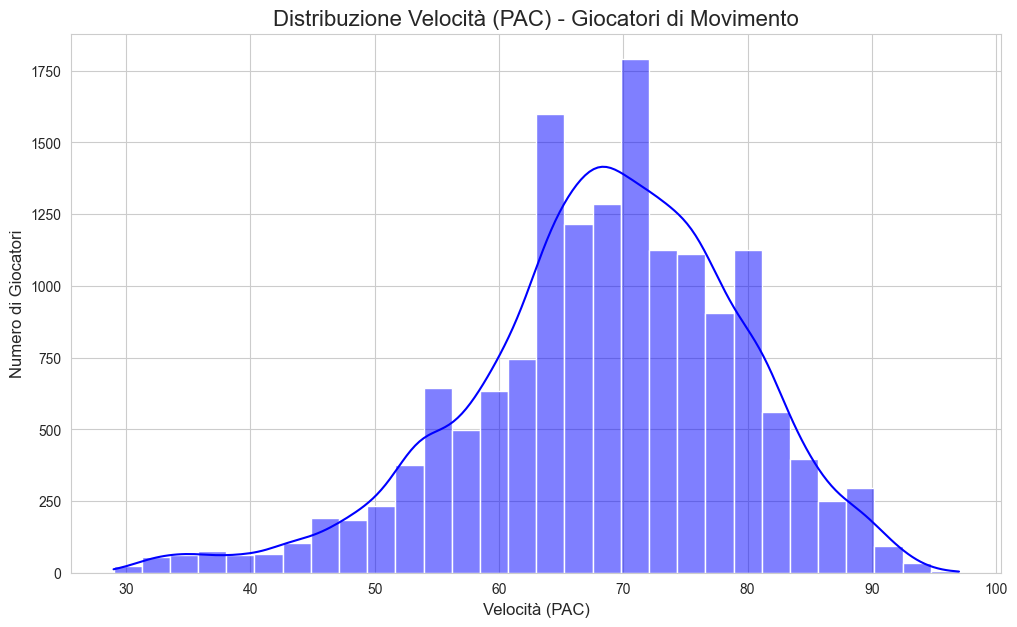

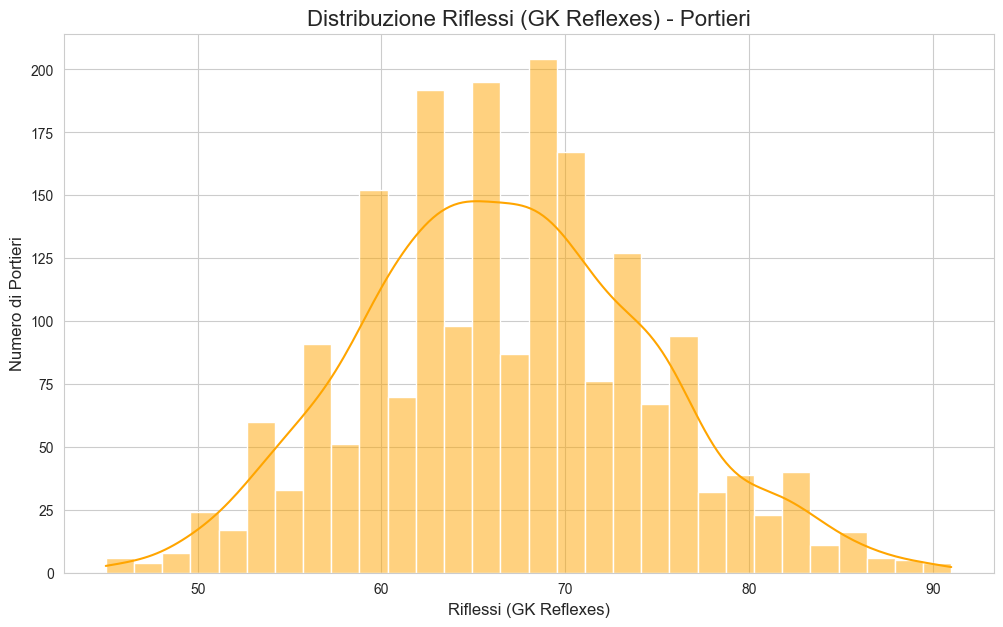

In [3]:
# --- CELLA 3: ISTOGRAMMI (PAC & GK REFLEXES) ---

print("Visualizzazione grafici distribuzione PAC e Riflessi...")

# Grafico 1: Distribuzione Velocità (PAC) - Giocatori di Movimento
plt.figure() # Crea una nuova figura
sns.histplot(df_movimento['PAC'], kde=True, bins=30, color='blue') 
plt.title('Distribuzione Velocità (PAC) - Giocatori di Movimento', fontsize=16)
plt.xlabel('Velocità (PAC)', fontsize=12)
plt.ylabel('Numero di Giocatori', fontsize=12)
plt.show()

# Grafico 2: Distribuzione Riflessi (GK Reflexes) - Portieri
plt.figure() # Crea una nuova figura
sns.histplot(df_portieri['GK Reflexes'], kde=True, bins=30, color='orange')
plt.title('Distribuzione Riflessi (GK Reflexes) - Portieri', fontsize=16)
plt.xlabel('Riflessi (GK Reflexes)', fontsize=12)
plt.ylabel('Numero di Portieri', fontsize=12)
plt.show()

Visualizzazione grafici distribuzione Tiro, Difesa e Rinvio...


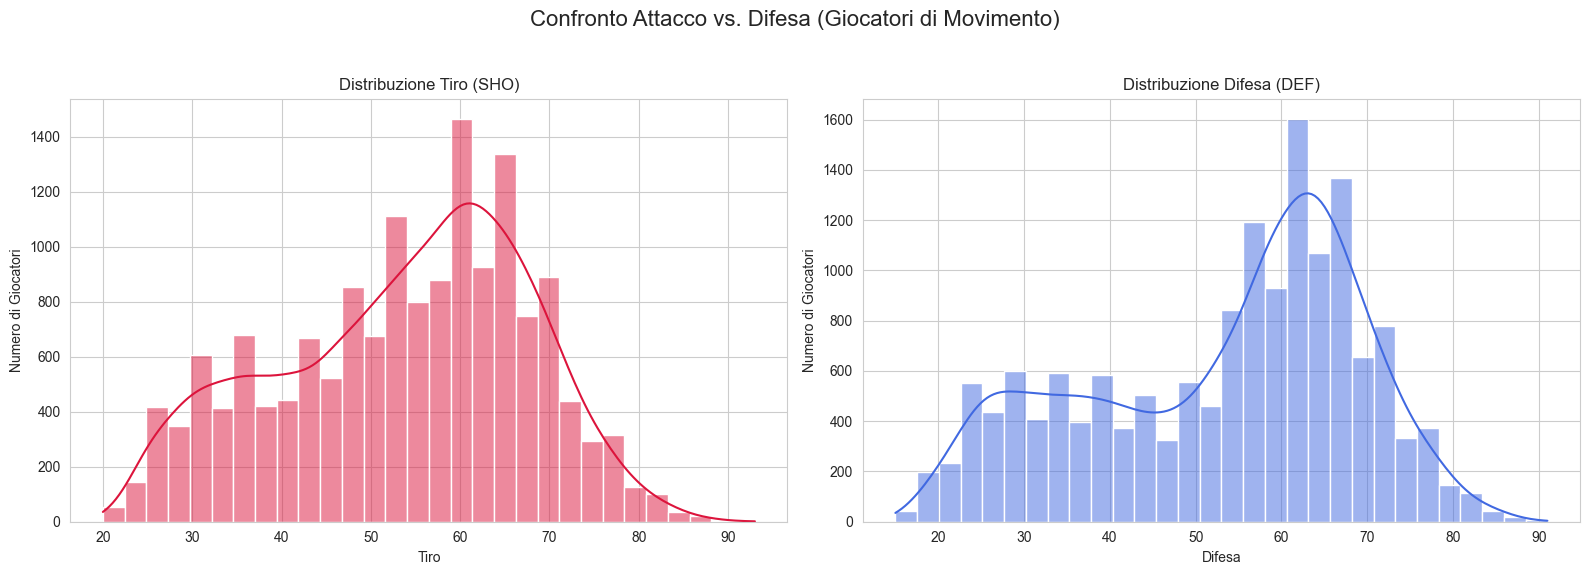

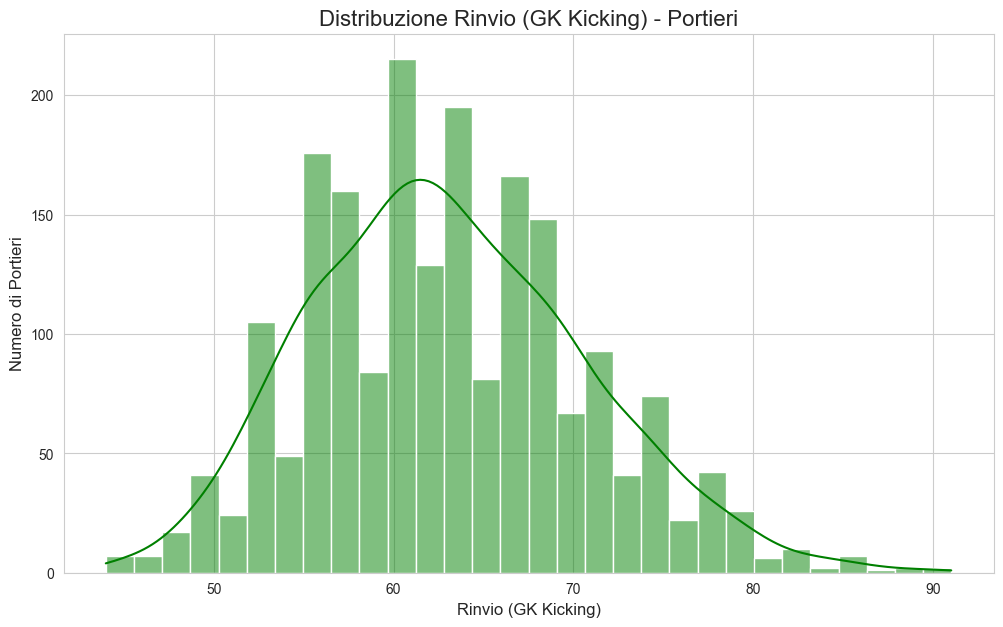

In [4]:
# --- CELLA 4: ISTOGRAMMI (SHO, DEF & GK KICKING) ---

print("Visualizzazione grafici distribuzione Tiro, Difesa e Rinvio...")

# Grafico 3 & 4: Confronto Tiro vs. Difesa (Giocatori di Movimento)
# Usiamo i subplots per metterli fianco a fianco
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 riga, 2 colonne
fig.suptitle('Confronto Attacco vs. Difesa (Giocatori di Movimento)', fontsize=16)

# Grafico 3: Tiro (SHO)
sns.histplot(df_movimento['SHO'], kde=True, bins=30, ax=axes[0], color='crimson')
axes[0].set_title('Distribuzione Tiro (SHO)')
axes[0].set_xlabel('Tiro')
axes[0].set_ylabel('Numero di Giocatori')

# Grafico 4: Difesa (DEF)
sns.histplot(df_movimento['DEF'], kde=True, bins=30, ax=axes[1], color='royalblue')
axes[1].set_title('Distribuzione Difesa (DEF)')
axes[1].set_xlabel('Difesa')
axes[1].set_ylabel('Numero di Giocatori')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Aggiusta la spaziatura per il titolo
plt.show()

# Grafico 5: Distribuzione Rinvio (GK Kicking) - Portieri
plt.figure() # Nuova figura
sns.histplot(df_portieri['GK Kicking'], kde=True, bins=30, color='green')
plt.title('Distribuzione Rinvio (GK Kicking) - Portieri', fontsize=16)
plt.xlabel('Rinvio (GK Kicking)', fontsize=12)
plt.ylabel('Numero di Portieri', fontsize=12)
plt.show()

### SKILL E PIEDE DEBOLE

Visualizzazione grafici Skill Moves e Piede Debole...


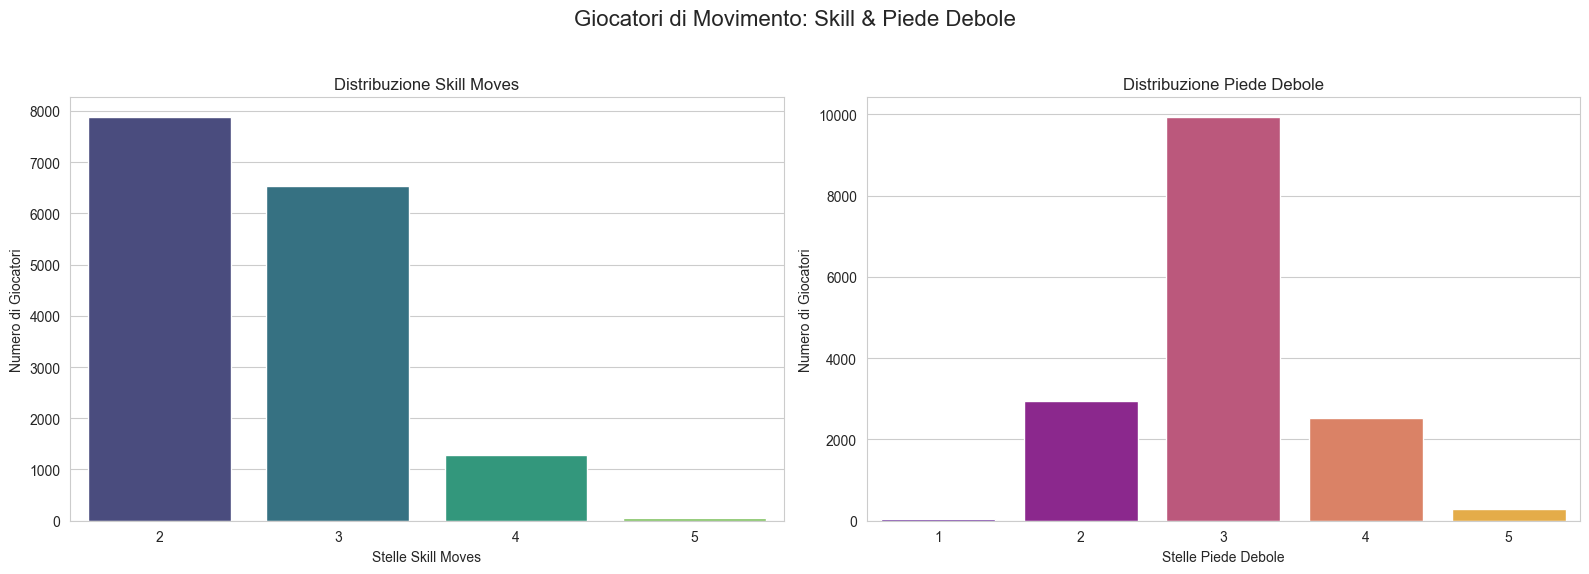

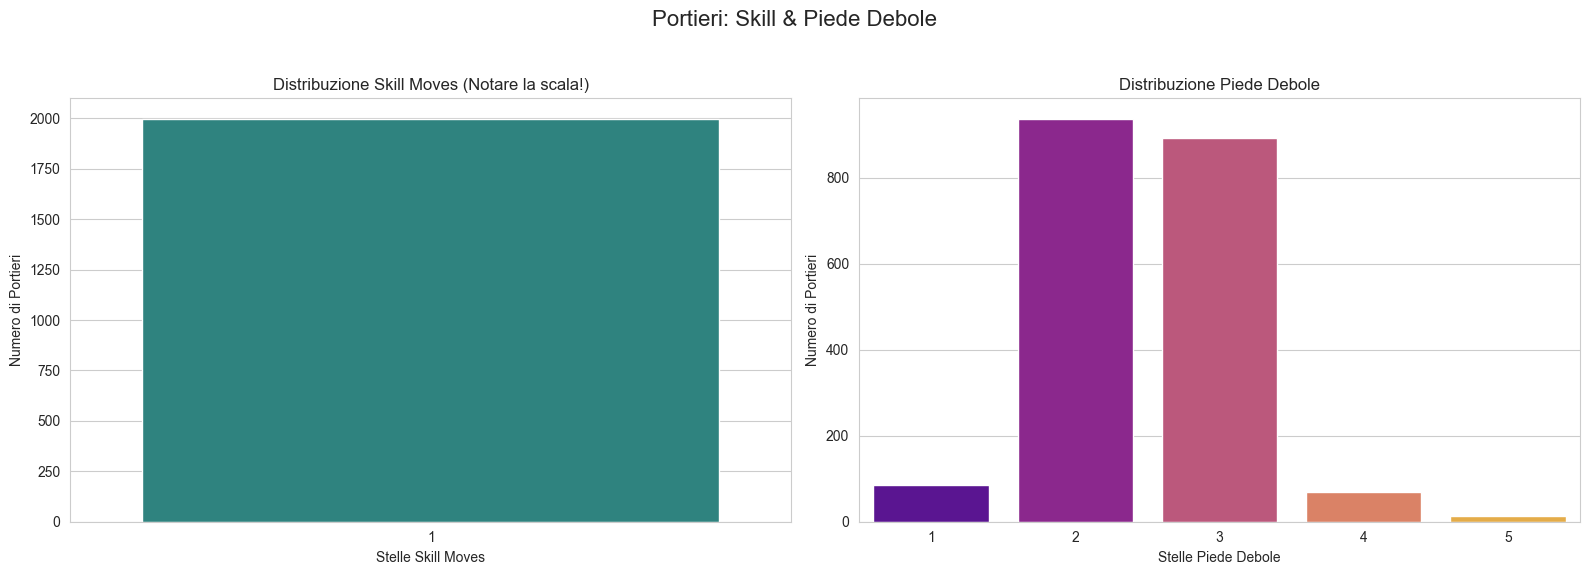

In [5]:
# --- CELLA 5: GRAFICI A BARRE (SKILL MOVES & WEAK FOOT) ---

print("Visualizzazione grafici Skill Moves e Piede Debole...")

# Grafico 6 & 7: Giocatori di Movimento
fig_mov, axes_mov = plt.subplots(1, 2, figsize=(16, 6))
fig_mov.suptitle('Giocatori di Movimento: Skill & Piede Debole', fontsize=16)

sns.countplot(data=df_movimento, x='Skill moves', ax=axes_mov[0], palette='viridis')
axes_mov[0].set_title('Distribuzione Skill Moves')
axes_mov[0].set_xlabel('Stelle Skill Moves')
axes_mov[0].set_ylabel('Numero di Giocatori')

sns.countplot(data=df_movimento, x='Weak foot', ax=axes_mov[1], palette='plasma')
axes_mov[1].set_title('Distribuzione Piede Debole')
axes_mov[1].set_xlabel('Stelle Piede Debole')
axes_mov[1].set_ylabel('Numero di Giocatori')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Grafico 8 & 9: Portieri
fig_gk, axes_gk = plt.subplots(1, 2, figsize=(16, 6))
fig_gk.suptitle('Portieri: Skill & Piede Debole', fontsize=16)

sns.countplot(data=df_portieri, x='Skill moves', ax=axes_gk[0], palette='viridis')
axes_gk[0].set_title('Distribuzione Skill Moves (Notare la scala!)')
axes_gk[0].set_xlabel('Stelle Skill Moves')
axes_gk[0].set_ylabel('Numero di Portieri')

sns.countplot(data=df_portieri, x='Weak foot', ax=axes_gk[1], palette='plasma')
axes_gk[1].set_title('Distribuzione Piede Debole')
axes_gk[1].set_xlabel('Stelle Piede Debole')
axes_gk[1].set_ylabel('Numero di Portieri')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### MAPPA DI CORRELAZIONE (DIVISA PER RUOLO)

Generazione Matrici di Correlazione per Attaccanti e Difensori...
Trovati 3210 attaccanti.
Trovati 5922 difensori.


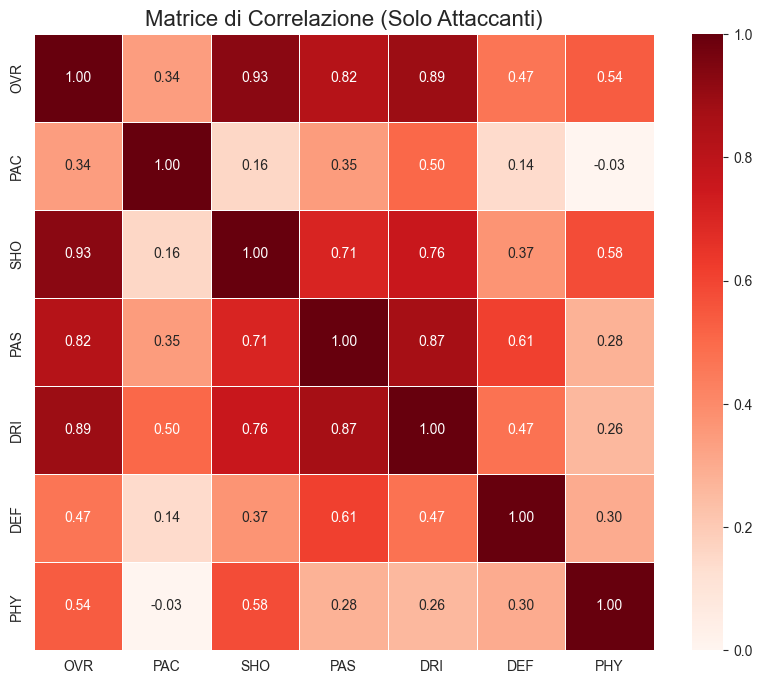

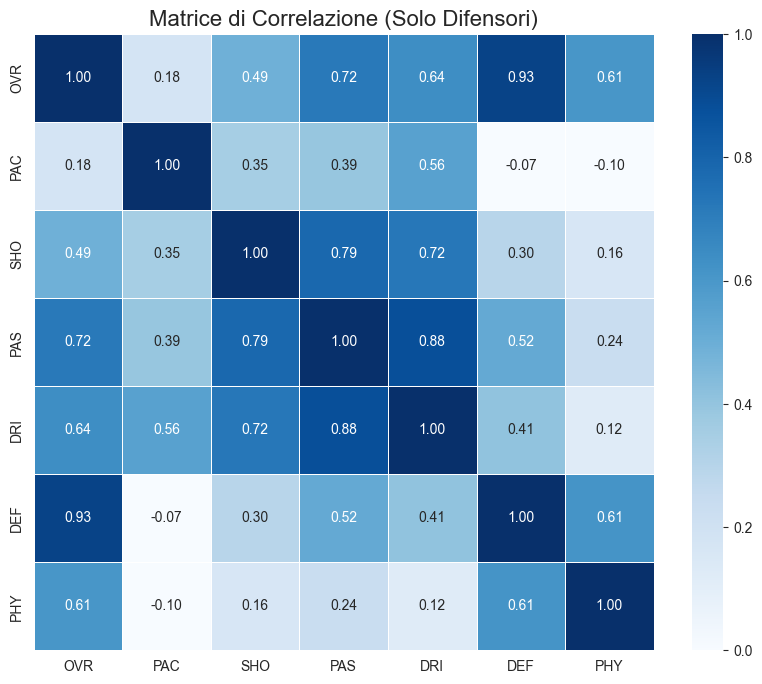

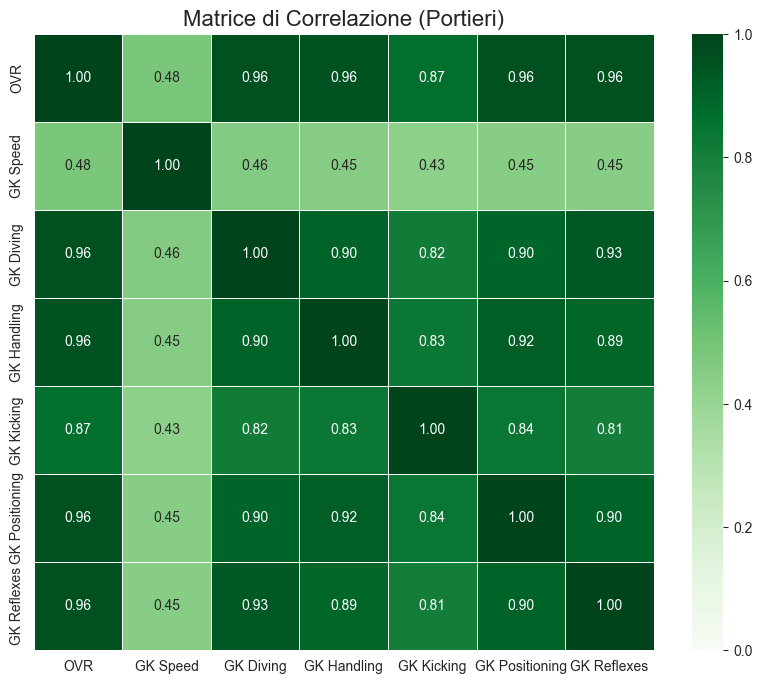

In [6]:
# --- CELLA 6: MATRICI DI CORRELAZIONE (PER RUOLO) ---

print("Generazione Matrici di Correlazione per Attaccanti e Difensori...")

# 1. Definiamo i macro-ruoli
attaccanti_list = ['ST', 'LW', 'RW', 'CF']
difensori_list = ['CB', 'LB', 'RB', 'LWB', 'RWB']
# Nota: i centrocampisti (CAM, CM, CDM...) li ignoriamo per questo confronto diretto

# 2. Filtriamo i DataFrame
df_attaccanti = df_movimento[df_movimento['Position'].isin(attaccanti_list)]
df_difensori = df_movimento[df_movimento['Position'].isin(difensori_list)]

print(f"Trovati {len(df_attaccanti)} attaccanti.")
print(f"Trovati {len(df_difensori)} difensori.")

# 3. Definiamo le statistiche da correlare
stats_corr = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

# 4. Heatmap solo Attaccanti
corr_matrix_att = df_attaccanti[stats_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_att, annot=True, cmap='Reds', fmt='.2f', linewidths=.5, vmin=0, vmax=1)
plt.title('Matrice di Correlazione (Solo Attaccanti)', fontsize=16)
plt.show()

# 5. Heatmap solo Difensori
corr_matrix_def = df_difensori[stats_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_def, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, vmin=0, vmax=1)
plt.title('Matrice di Correlazione (Solo Difensori)', fontsize=16)
plt.show()

# 6. Heatmap Portieri (già che ci siamo, facciamo anche la loro)
stats_corr_gk = ['OVR', 'GK Speed', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
corr_matrix_gk = df_portieri[stats_corr_gk].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_gk, annot=True, cmap='Greens', fmt='.2f', linewidths=.5, vmin=0, vmax=1)
plt.title('Matrice di Correlazione (Portieri)', fontsize=16)
plt.show()